In [1]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/Libe

In [2]:
# 실행후 런타임 다시시작및 모두실행도 꼭해주기!

!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 그래프 크기 고정
plt.rcParams["figure.figsize"] = (12, 9)

# 음수 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [3]:
import urllib.request

# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")

('ratings_train.txt', <http.client.HTTPMessage at 0x7f9a7c14f310>)

In [4]:
import pandas as pd

df = pd.read_table("ratings_train.txt")
df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


label 0 : 부정리뷰, 1 : 긍정 리뷰

In [6]:
# 과제 목적 : 부정 리뷰(0)의 tfidf 기반 워드 클라우드, 긍정 리뷰(1)의 tfidf 기반 워드 클라우드,
#  형태소 분석기 : mecab 사용. 명사만 활용해 보기.

df_negative = df[df['label'] == 0]
# df_positive = df[df['label'] == 1]

In [7]:
df_negative = df_negative[:10]

In [8]:
df_negative.shape

(10, 3)

In [9]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# mecab
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

from konlpy.tag import Mecab

mecab = Mecab()

--2022-12-16 01:26:09--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-12-16 01:26:10--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5634b48930ea446671fec4036c.dl.dropboxusercontent.com/cd/0/get/Byt5jlw3mliz9WlHVPJM0tI8DXanwEOvqnGzTbnWR6Bk_Dzg1fE4eqg1QGtCrvgm9yz9P5OteIwtsj4D8NPyRqO30-VZ9aN0afITaBwOYitc3NTvDj7s4P4JycRfmENFyqJyTS5_RV6LkCyccRfQYAMbniWkm0ss-LL1s0iYPq0_0QcIChmzPQaPU31s3Se35-c/file?dl=1# [following]
--2022-12-16 01:26:10--  https://uc5634b48930ea446671fec4036c.dl.dropboxusercontent.com/cd/0/get/Byt5jlw3mli

In [11]:
negative_reviews = df_negative['document'].map(str).reset_index(drop=True)
negative_reviews

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                                    너무재밓었다그래서보는것을추천한다
2                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
3        막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
4                                원작의 긴장감을 제대로 살려내지못했다.
5    별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...
6                  울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해
7    취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어...
8                   굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐
9    재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의...
Name: document, dtype: object

In [12]:
negative_reviews = [' '.join(mecab.nouns(review)) for review in negative_reviews]
negative_reviews[:3]

['짜증 나 목소리', '', '교도소 이야기 재미 평점 조정']

In [13]:
df_negative['result'] = negative_reviews
df_negative.head(10)

,id,document,label,result
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,짜증 나 목소리
2,10265843,너무재밓었다그래서보는것을추천한다,0,
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기 재미 평점 조정
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0,걸음마 세 초등 학교 학년 살 영화 개
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0,원작 긴장감
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0,반개 욕 이응경 길용우 연기 생활 년 발 그것 납치 감금 반복 반복 드라마 가족 연...
12,5957425,울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해,0,횡단 보도 때 뻔 이범수 연기
14,9864035,취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어...,0,취향 존중 내생 극장 영화 중 잼 감동 스토리 감동 어거지
17,4891476,굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐,0,굿바이 레닌 표절 것 이해 뒤
22,9705777,재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의...,0,음식 영화 바베트 만찬 바베트 만찬 이야기 음식 재미 이건 게 음식 핀란드 풍경 구...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

negative_review_tfidf_vectorizer = TfidfVectorizer().fit(df_negative['result'])
negative_review_tfidf_vectorizer

TfidfVectorizer()

In [15]:
negative_review_tfidf_vectorizer.vocabulary_

{'짜증': 37,
 '목소리': 16,
 '교도소': 4,
 '이야기': 31,
 '재미': 34,
 '평점': 40,
 '조정': 35,
 '걸음마': 3,
 '초등': 38,
 '학교': 44,
 '학년': 45,
 '영화': 26,
 '원작': 27,
 '긴장감': 9,
 '반개': 18,
 '이응경': 32,
 '길용우': 10,
 '연기': 25,
 '생활': 22,
 '그것': 7,
 '납치': 11,
 '감금': 1,
 '반복': 19,
 '드라마': 13,
 '가족': 0,
 '사람': 21,
 '횡단': 46,
 '보도': 20,
 '이범수': 30,
 '취향': 39,
 '존중': 36,
 '내생': 12,
 '극장': 8,
 '감동': 2,
 '스토리': 23,
 '어거지': 24,
 '굿바이': 6,
 '레닌': 14,
 '표절': 41,
 '이해': 33,
 '음식': 28,
 '바베트': 17,
 '만찬': 15,
 '이건': 29,
 '핀란드': 43,
 '풍경': 42,
 '구경': 5}

In [16]:
# 점수구해주는 함수
def average_tfidf_score(documents):
  scores = {}
  tfidf_scores = negative_review_tfidf_vectorizer.transform(documents)

  for document, tfidf_score in zip(documents,tfidf_scores ):  # tfidf_score 1 X vocab개수 
    for term in negative_review_tfidf_vectorizer.vocabulary_:
      scores[term] = tfidf_score[0, negative_review_tfidf_vectorizer.vocabulary_[str(term).strip()]] + scores.get(term, 0)
    
  return scores

In [17]:
average_tfidf_score(df_negative['result'])

{'짜증': 0.7071067811865475,
 '목소리': 0.7071067811865475,
 '교도소': 0.4742954325768623,
 '이야기': 0.577735744558808,
 '재미': 0.577735744558808,
 '평점': 0.4742954325768623,
 '조정': 0.4742954325768623,
 '걸음마': 0.4686458822988574,
 '초등': 0.4686458822988574,
 '학교': 0.4686458822988574,
 '학년': 0.4686458822988574,
 '영화': 0.7301901433140227,
 '원작': 0.7071067811865475,
 '긴장감': 0.7071067811865475,
 '반개': 0.24534225465849252,
 '이응경': 0.24534225465849252,
 '길용우': 0.24534225465849252,
 '연기': 0.857721280808619,
 '생활': 0.24534225465849252,
 '그것': 0.3831046261707778,
 '납치': 0.24534225465849252,
 '감금': 0.24534225465849252,
 '반복': 0.49068450931698504,
 '드라마': 0.24534225465849252,
 '가족': 0.24534225465849252,
 '사람': 0.24534225465849252,
 '횡단': 0.5182909034319405,
 '보도': 0.5182909034319405,
 '이범수': 0.5182909034319405,
 '취향': 0.30782882379731447,
 '존중': 0.30782882379731447,
 '내생': 0.30782882379731447,
 '극장': 0.30782882379731447,
 '감동': 0.6156576475946289,
 '스토리': 0.30782882379731447,
 '어거지': 0.30782882379731447,
 '굿바

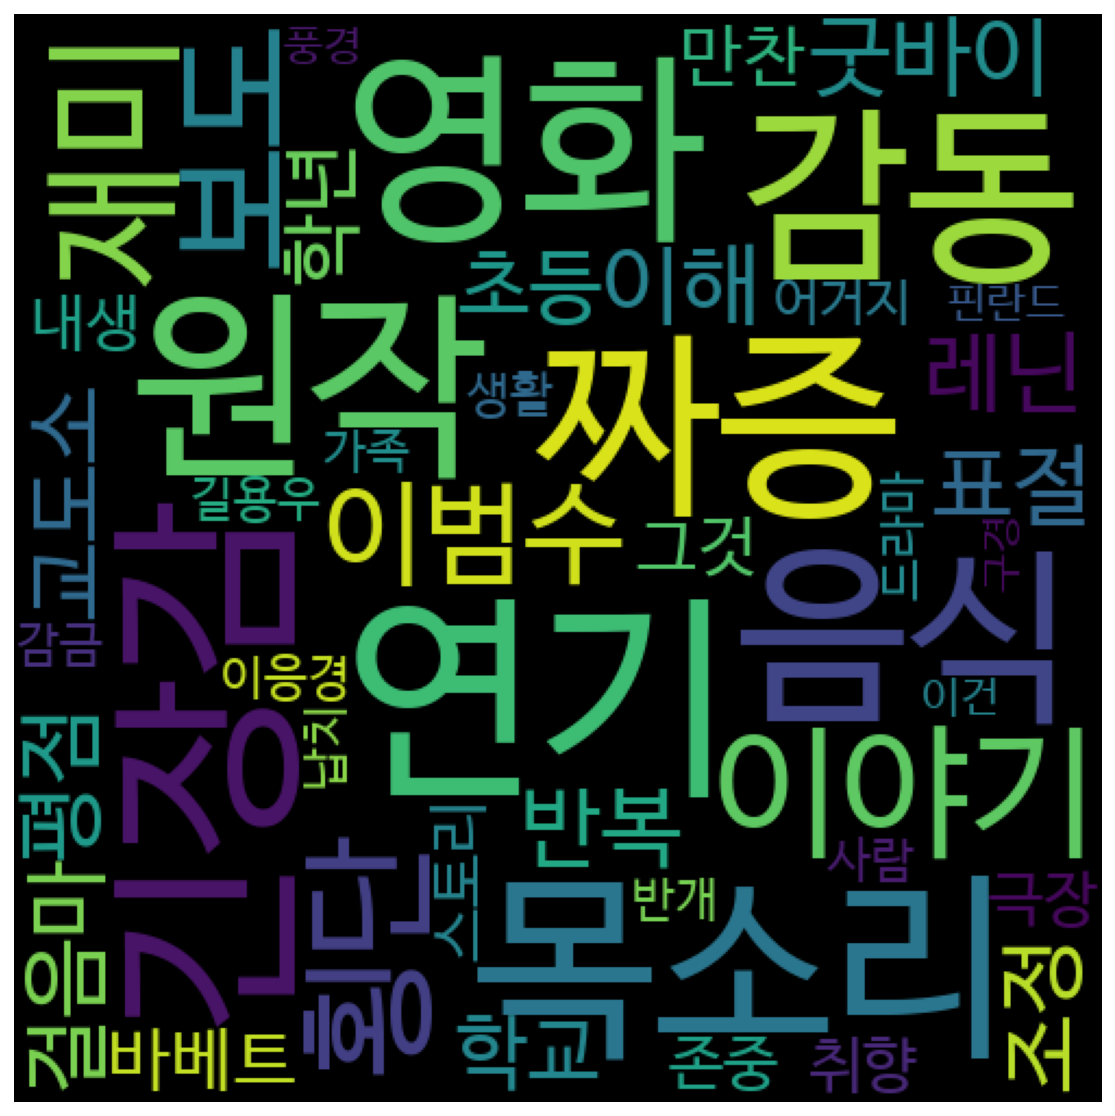

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(max_font_size=100, width=500, height=500, font_path = fontpath) # font_path꼭 붙여주기!⭐
negative_tfidf_wc = wc.generate_from_frequencies(average_tfidf_score(df_negative['result']))


plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(negative_tfidf_wc)
plt.show()